In [29]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
import random as rdm
import math

import matplotlib.pyplot as plt


# Scikit Imports
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Packages for analysis
import pandas as pd

In [85]:
N = 14
datafile = 'data/DATOS_N=' + str(N) + '_0p25-1p75_1000_totest.npy'
data = np.load(datafile)
data

array([[-7.63544305e-09+0.j,  6.51851200e-10+0.j,  1.55354741e-09+0.j,
        ..., -3.33342281e-08+0.j,  9.72545099e-01+0.j,
         2.50000000e-01+0.j],
       [-7.96850533e-09+0.j,  7.15580966e-10+0.j,  1.56112612e-09+0.j,
        ..., -3.42715000e-08+0.j,  9.72212909e-01+0.j,
         2.51501502e-01+0.j],
       [-8.31425654e-09+0.j,  7.81908084e-10+0.j,  1.56784846e-09+0.j,
        ..., -3.52091586e-08+0.j,  9.71878695e-01+0.j,
         2.53003003e-01+0.j],
       ...,
       [-1.11247120e-03+0.j, -1.07651713e-03+0.j,  1.06758628e-03+0.j,
        ...,  3.47300150e-02+0.j,  6.90728849e-02+0.j,
         1.74699700e+00+0.j],
       [-1.11286942e-03+0.j, -1.08097744e-03+0.j,  1.07217080e-03+0.j,
        ...,  3.47710870e-02+0.j,  6.88399615e-02+0.j,
         1.74849850e+00+0.j],
       [-1.11326676e-03+0.j, -1.08542936e-03+0.j,  1.07674646e-03+0.j,
        ...,  3.48114934e-02+0.j,  6.86081830e-02+0.j,
         1.75000000e+00+0.j]])

In [86]:
train=np.zeros((1, data.shape[1]))
test=data.copy()
print(test.shape)

#construimos dos datasets train y test
 


for i, J in enumerate (data[:, data.shape[1]-1], 0):
    if J>0.6 and J<0.7:
        train=np.append(train, [data[i, :]], axis=0)
        #test=np.delete(test, i, axis=0)
    if J>1.6 and J<1.7:
        train=np.append(train, [data[i, :]], axis=0)
        #test=np.delete(test, i, axis=0)
        
train=np.delete(train, 0, axis=0)



for j, J_train in enumerate (train[:, train.shape[1]-1], 0):
    for i, J in enumerate (test[:, test.shape[1]-1], 0):
        if J==J_train:
            test=np.delete(test, i, axis=0)
       

print (test.shape)
print (train.shape)

""" 
        
#para entrenar con J's aleatorias

trainlist=range(0,400)
print(len(trainlist))

for i, random in enumerate (trainlist):
    random=rdm.uniform(0,3)
    for j, J in enumerate (data[:, data.shape[1]-1]):
        if random-0.00025<J and random+0.00025>J:
            train=np.append(train, [data[j, :]], axis=0)
        
train=np.delete(train, 0, axis=0)


for j, J_train in enumerate (train[:, train.shape[1]-1], 0):
    for i, J in enumerate (test[:, test.shape[1]-1], 0):
        if J==J_train:
            test=np.delete(test, i, axis=0)


print (test.shape)
print (train.shape)

""" 

#Voy a convertir la última columna en 0,1 siendo 0 la fase desordenada (para) y 1 la fase ordenada(ferro)

Jc=1;   #si no se dónde está la Jc cómo separo los datos??? aprox???
Jtrain=[]
Jtest=[]
Jtrain=train[:, train.shape[1]-1].copy()
Jtest=test[:, test.shape[1]-1].copy()#si los igualo se guardan por referencia CAUTION!!!!
Jtodo=data[:, data.shape[1]-1].copy()

for i, J in enumerate (train[:, train.shape[1]-1], 0):
    if J<Jc:
        train[i, train.shape[1]-1]=0
    if J>Jc:
        train[i, train.shape[1]-1]=1
        
for i, J in enumerate (test[:, test.shape[1]-1], 0):
    if J<Jc:
        test[i, test.shape[1]-1]=0
    if J>Jc:
        test[i, test.shape[1]-1]=1
        
for i, J in enumerate (data[:, data.shape[1]-1], 0):
    if J<Jc:
        data[i, data.shape[1]-1]=0
    if J>Jc:
        data[i, data.shape[1]-1]=1
     
Jtrain = np.real(Jtrain)
Jtest = np.real(Jtest)
Jtodo=np.real(Jtodo)
        
#Jtrain = Jtrain.reshape(-1,1)
print (np.shape(Jtrain))
#print (Jtest[2799,])

(1000, 16385)
(868, 16385)
(132, 16385)
(132,)


In [87]:
#Ya tengo los datos con los que voy a entrenar mi SVM, separo la última columna que es la que clasifica

fdo_train=np.delete(train, train.shape[1]-1, axis=1)
teorico_train = np.where(train[:, train.shape[1]-1]==0, 0, 1)
print(fdo_train.shape)      
teorico_train = teorico_train.reshape(-1,1)
print(teorico_train.shape)


#Hago los mismo con los datos test

fdo_test=np.delete(test, train.shape[1]-1, axis=1)
teorico_test = np.where(test[:, test.shape[1]-1]==0, 0, 1)
print(fdo_test.shape)
print(teorico_test.shape)

#y otro conjunto que son TODOS los datos juntos

fdo_todo=np.delete(data, data.shape[1]-1, axis=1)
teorico_todo = np.where(data[:, data.shape[1]-1]==0, 0, 1)
print(fdo_todo.shape)
print(teorico_todo.shape)

(132, 16384)
(132, 1)
(868, 16384)
(868,)
(1000, 16384)
(1000,)


In [88]:
#defino mi kernel

def mikernel(X, X_p):
    result=np.empty((len(X), len(X_p)))
    for i, J in enumerate (X[:, 0]):
        v1=X[i,:]
        for j, J2 in enumerate (X_p[:, 0]):
            v2=X_p[j,:]
            dot=np.vdot(v1,v2)
            result[i][j]=abs(dot)
    return(result)
    

In [89]:
model = svm.SVC(kernel = mikernel )
model.fit(fdo_train, teorico_train)
y_train = model.predict(fdo_train)
print(np.shape(y_train))
print(model.support_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(132,)
[64 65 66 67]


In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(teorico_train,y_train))
print(classification_report(teorico_train,y_train))

[[66  0]
 [ 0 66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        66

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [91]:
#Ahora lo aplicamos sobre los datos test para probar cómo separa
y_test = model.predict(fdo_test)
print(model.support_)

[64 65 66 67]


In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(teorico_test,y_test))
print(classification_report(teorico_test,y_test))

[[434   0]
 [ 33 401]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       434
           1       1.00      0.92      0.96       434

    accuracy                           0.96       868
   macro avg       0.96      0.96      0.96       868
weighted avg       0.96      0.96      0.96       868



In [93]:
originalkernel=mikernel(fdo_todo, fdo_todo)

In [94]:
#para pintar aplico el modelo a TODO el espacio de J's 

y_todo = model.predict(fdo_todo)
print(y_todo.shape)
print(Jtodo.shape)
vectors=model.support_vectors_
print(model.support_)
#print(Jtrain[66])
#plt.plot(Jtrain, y_train, 'bo')
#np.savetxt("predictedN4.txt", y_todo)



(1000,)
(1000,)
[64 65 66 67]


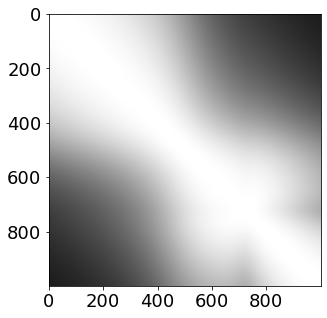

In [95]:
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 18

plt.imshow(originalkernel,vmin=0,vmax=1, cmap = 'gray')
#plt.savefig("Kernel11x11.jpg")
#np.savetxt("kernel12x12.txt", kernel)
plt.show()

1000


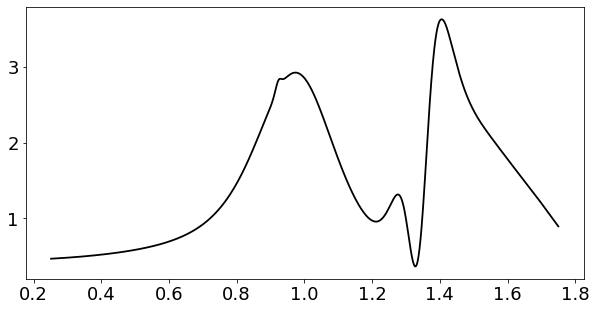

In [96]:
originaldistance=model.decision_function(fdo_todo)
print(len(originaldistance))
overlap = np.array([originalkernel[i, i + 1] for i in range(originalkernel.shape[0] - 1)])
#plt.plot(Jtodo[1:], overlap, c='k')
χ =  (1 - overlap) / (Jtodo[1] - Jtodo[0]) ** 2
plt.plot(Jtodo[1:], χ, c='k')

In [97]:
kernelfile = 'data_reduced/Kernel' + str(N)
distancefile =  'data_reduced/distance'  + str(N)
data_distance = np.array([Jtodo, originaldistance])
print(np.shape(data_distance))
np.save(kernelfile, originalkernel)
np.save(distancefile, data_distance)

(2, 1000)
